## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [7]:
import pandas as pd



## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [8]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
df.head()
df.tail()

,DATE,TAG,POSTS
2742,2025-01-01 00:00:00,php,626
2743,2025-01-01 00:00:00,python,3143
2744,2025-01-01 00:00:00,r,593
2745,2025-01-01 00:00:00,ruby,60
2746,2025-01-01 00:00:00,swift,419


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [11]:
df.shape

(2747, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
df.count()

,0
DATE,2747
TAG,2747
POSTS,2747


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [21]:
highest_post = df.groupby(['TAG']).sum()
highest_post.sort_values(by=['POSTS'], ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2532518
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2211695
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919712
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624186
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1467814
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813190
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,510363
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407304
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,336066


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [30]:
# check months count
months_count = df.groupby(['TAG']).count()
months_count.sort_values(by=['DATE'], ascending=True)

,DATE,POSTS
TAG,,
go,183,183
swift,189,189
r,196,196
assembly,198,198
c,198,198
c++,198,198
delphi,198,198
java,198,198
javascript,198,198


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [48]:
type(df.DATE[1])
df.DATE[1]
df.DATE = pd.to_datetime(df.DATE, format='ISO8601')
# df.DATE = df.DATE.dt.strftime('%Y-%m-%d')
# type(df.DATE)
# df.insert(1, 'NEW_DATE', pd.to_datetime(df.DATE, format='ISO8601'))
# df.head()
# df.pop('NEW_DATE')
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [52]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [55]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,631.0,129.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,85.0,444.0,1560.0,978.0,67.0,153.0,1268.0,2156.0,26.0,602.0,3683.0,744.0,82.0,504.0
2024-10-01,90.0,465.0,1591.0,916.0,85.0,177.0,1513.0,1878.0,21.0,649.0,3480.0,785.0,63.0,458.0
2024-11-01,98.0,401.0,1361.0,845.0,56.0,125.0,1261.0,1643.0,20.0,539.0,3144.0,694.0,75.0,387.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [56]:
reshaped_df.shape

(199, 14)

In [57]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,631.0,129.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [65]:
reshaped_df.columns
reshaped_df.tail()
# for col in reshaped_df.index:
#     print(col)

# len(reshaped_df.index)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-09-01,85.0,444.0,1560.0,978.0,67.0,153.0,1268.0,2156.0,26.0,602.0,3683.0,744.0,82.0,504.0
2024-10-01,90.0,465.0,1591.0,916.0,85.0,177.0,1513.0,1878.0,21.0,649.0,3480.0,785.0,63.0,458.0
2024-11-01,98.0,401.0,1361.0,845.0,56.0,125.0,1261.0,1643.0,20.0,539.0,3144.0,694.0,75.0,387.0
2024-12-01,91.0,330.0,1095.0,694.0,42.0,114.0,1172.0,1398.0,25.0,429.0,2706.0,550.0,53.0,317.0
2025-01-01,74.0,351.0,1291.0,839.0,60.0,156.0,1310.0,1718.0,27.0,626.0,3143.0,593.0,60.0,419.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [75]:
#Count the number of entries per column.

# reshaped_df.dropna().count().sort_values(ascending=False)
reshaped_df.count().sort_values(ascending=False)


,0
TAG,
c#,199
assembly,198
c,198
c++,198
delphi,198
java,198
javascript,198
perl,198
php,198


In [77]:
reshaped_df.count(axis='index')
reshaped_df.count(axis='columns')

,0
TAG,
assembly,198
c,198
c#,199
c++,198
delphi,198
go,183
java,198
javascript,198
perl,198


In [80]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [82]:
reshaped_df.fillna(0, inplace=True)

In [88]:
reshaped_df.count().sort_values(ascending=False)
reshaped_df.head()
reshaped_df.isna().values.any()
reshaped_df.isnull().sum()


,0
TAG,
assembly,0
c,0
c#,0
c++,0
delphi,0
go,0
java,0
javascript,0
perl,0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [89]:
import matplotlib.pyplot as plt

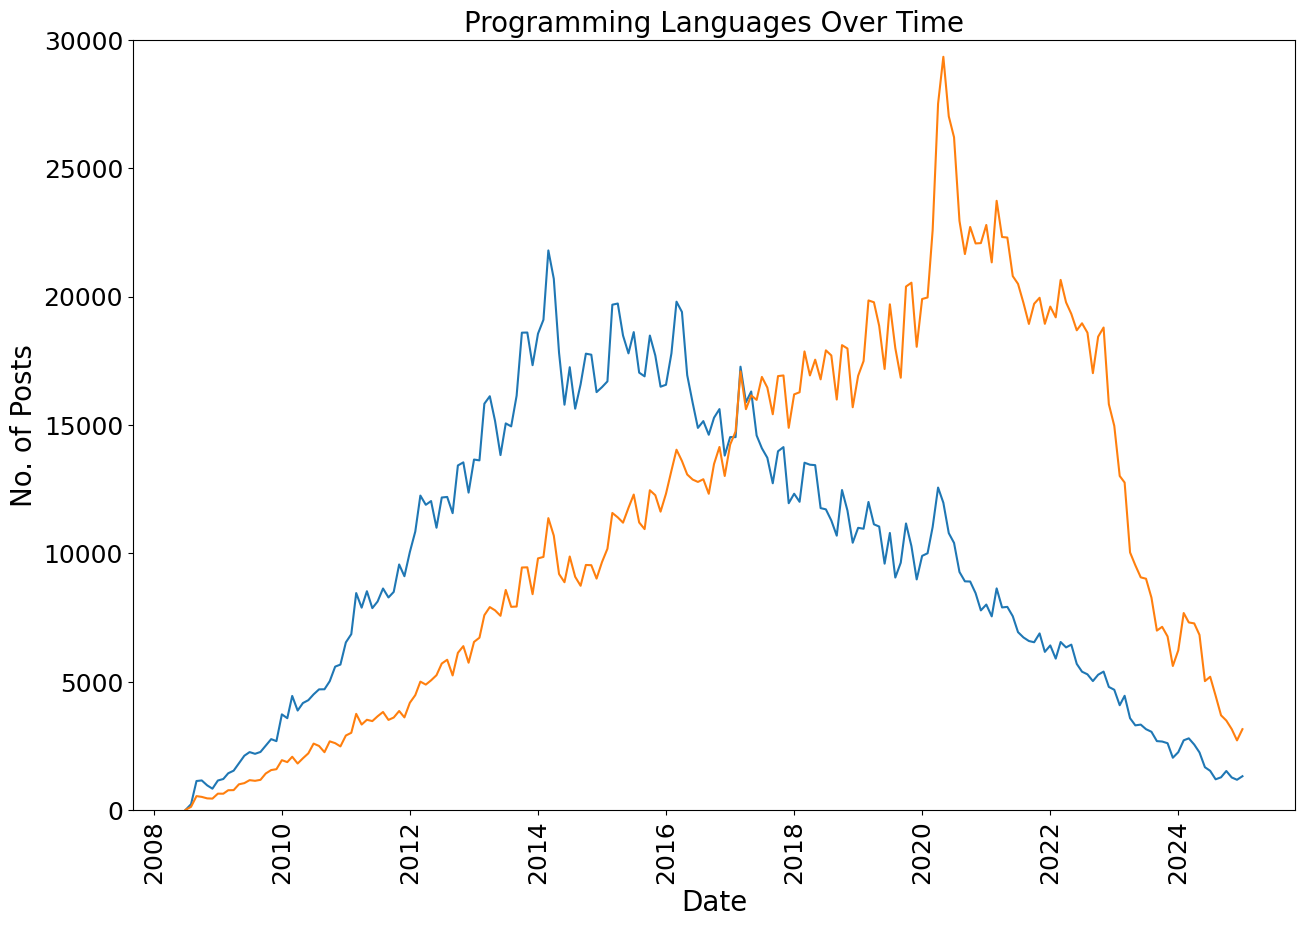

In [113]:
# reshaped_df.java.plot()
reshaped_df.head()
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90, size=18)
plt.yticks(size=18)
plt.title('Programming Languages Over Time', size=20)
plt.ylim(bottom=0, top=30000)
plt.xlabel('Date', size=20)
plt.ylabel('No. of Posts', size=20)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)

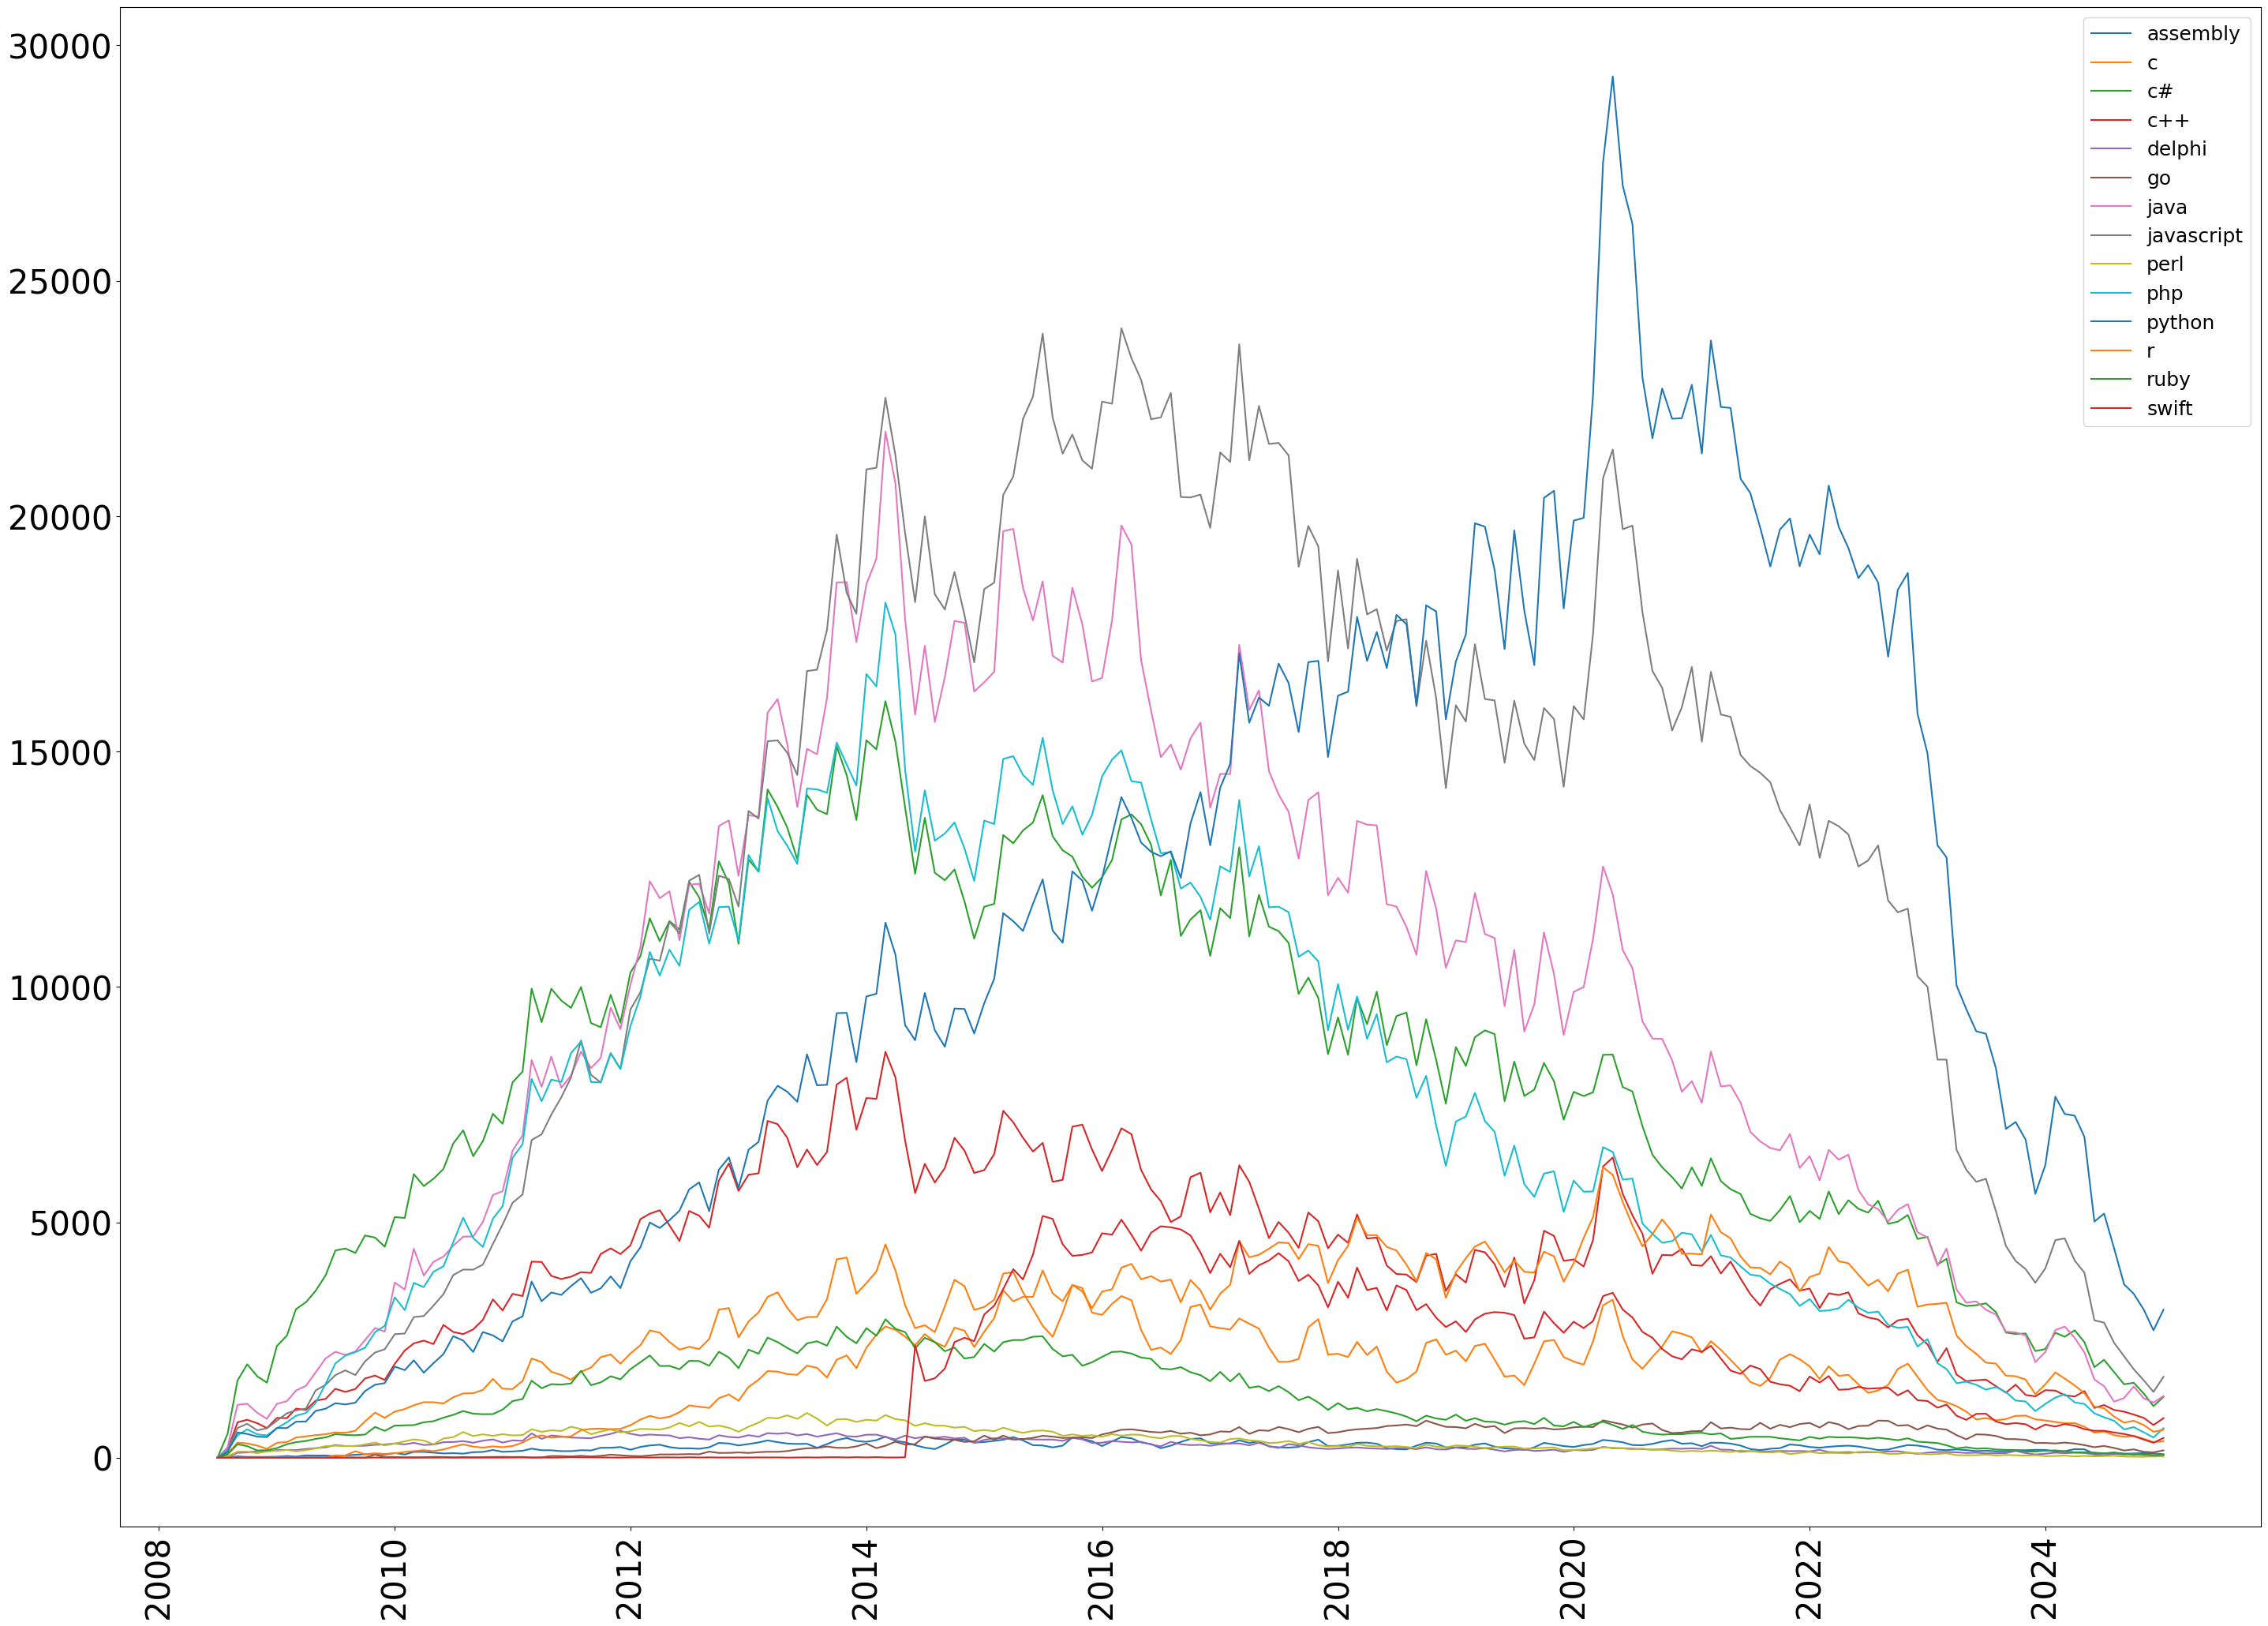

In [119]:
plt.figure(figsize=(35, 25))
plt.xticks(rotation=90, size=30)
plt.yticks(size=30)
for columns in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[columns], label=columns)
    plt.legend(fontsize=18)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [127]:
roll_df = reshaped_df.rolling(window=12).mean()
roll_df.shape

(199, 14)

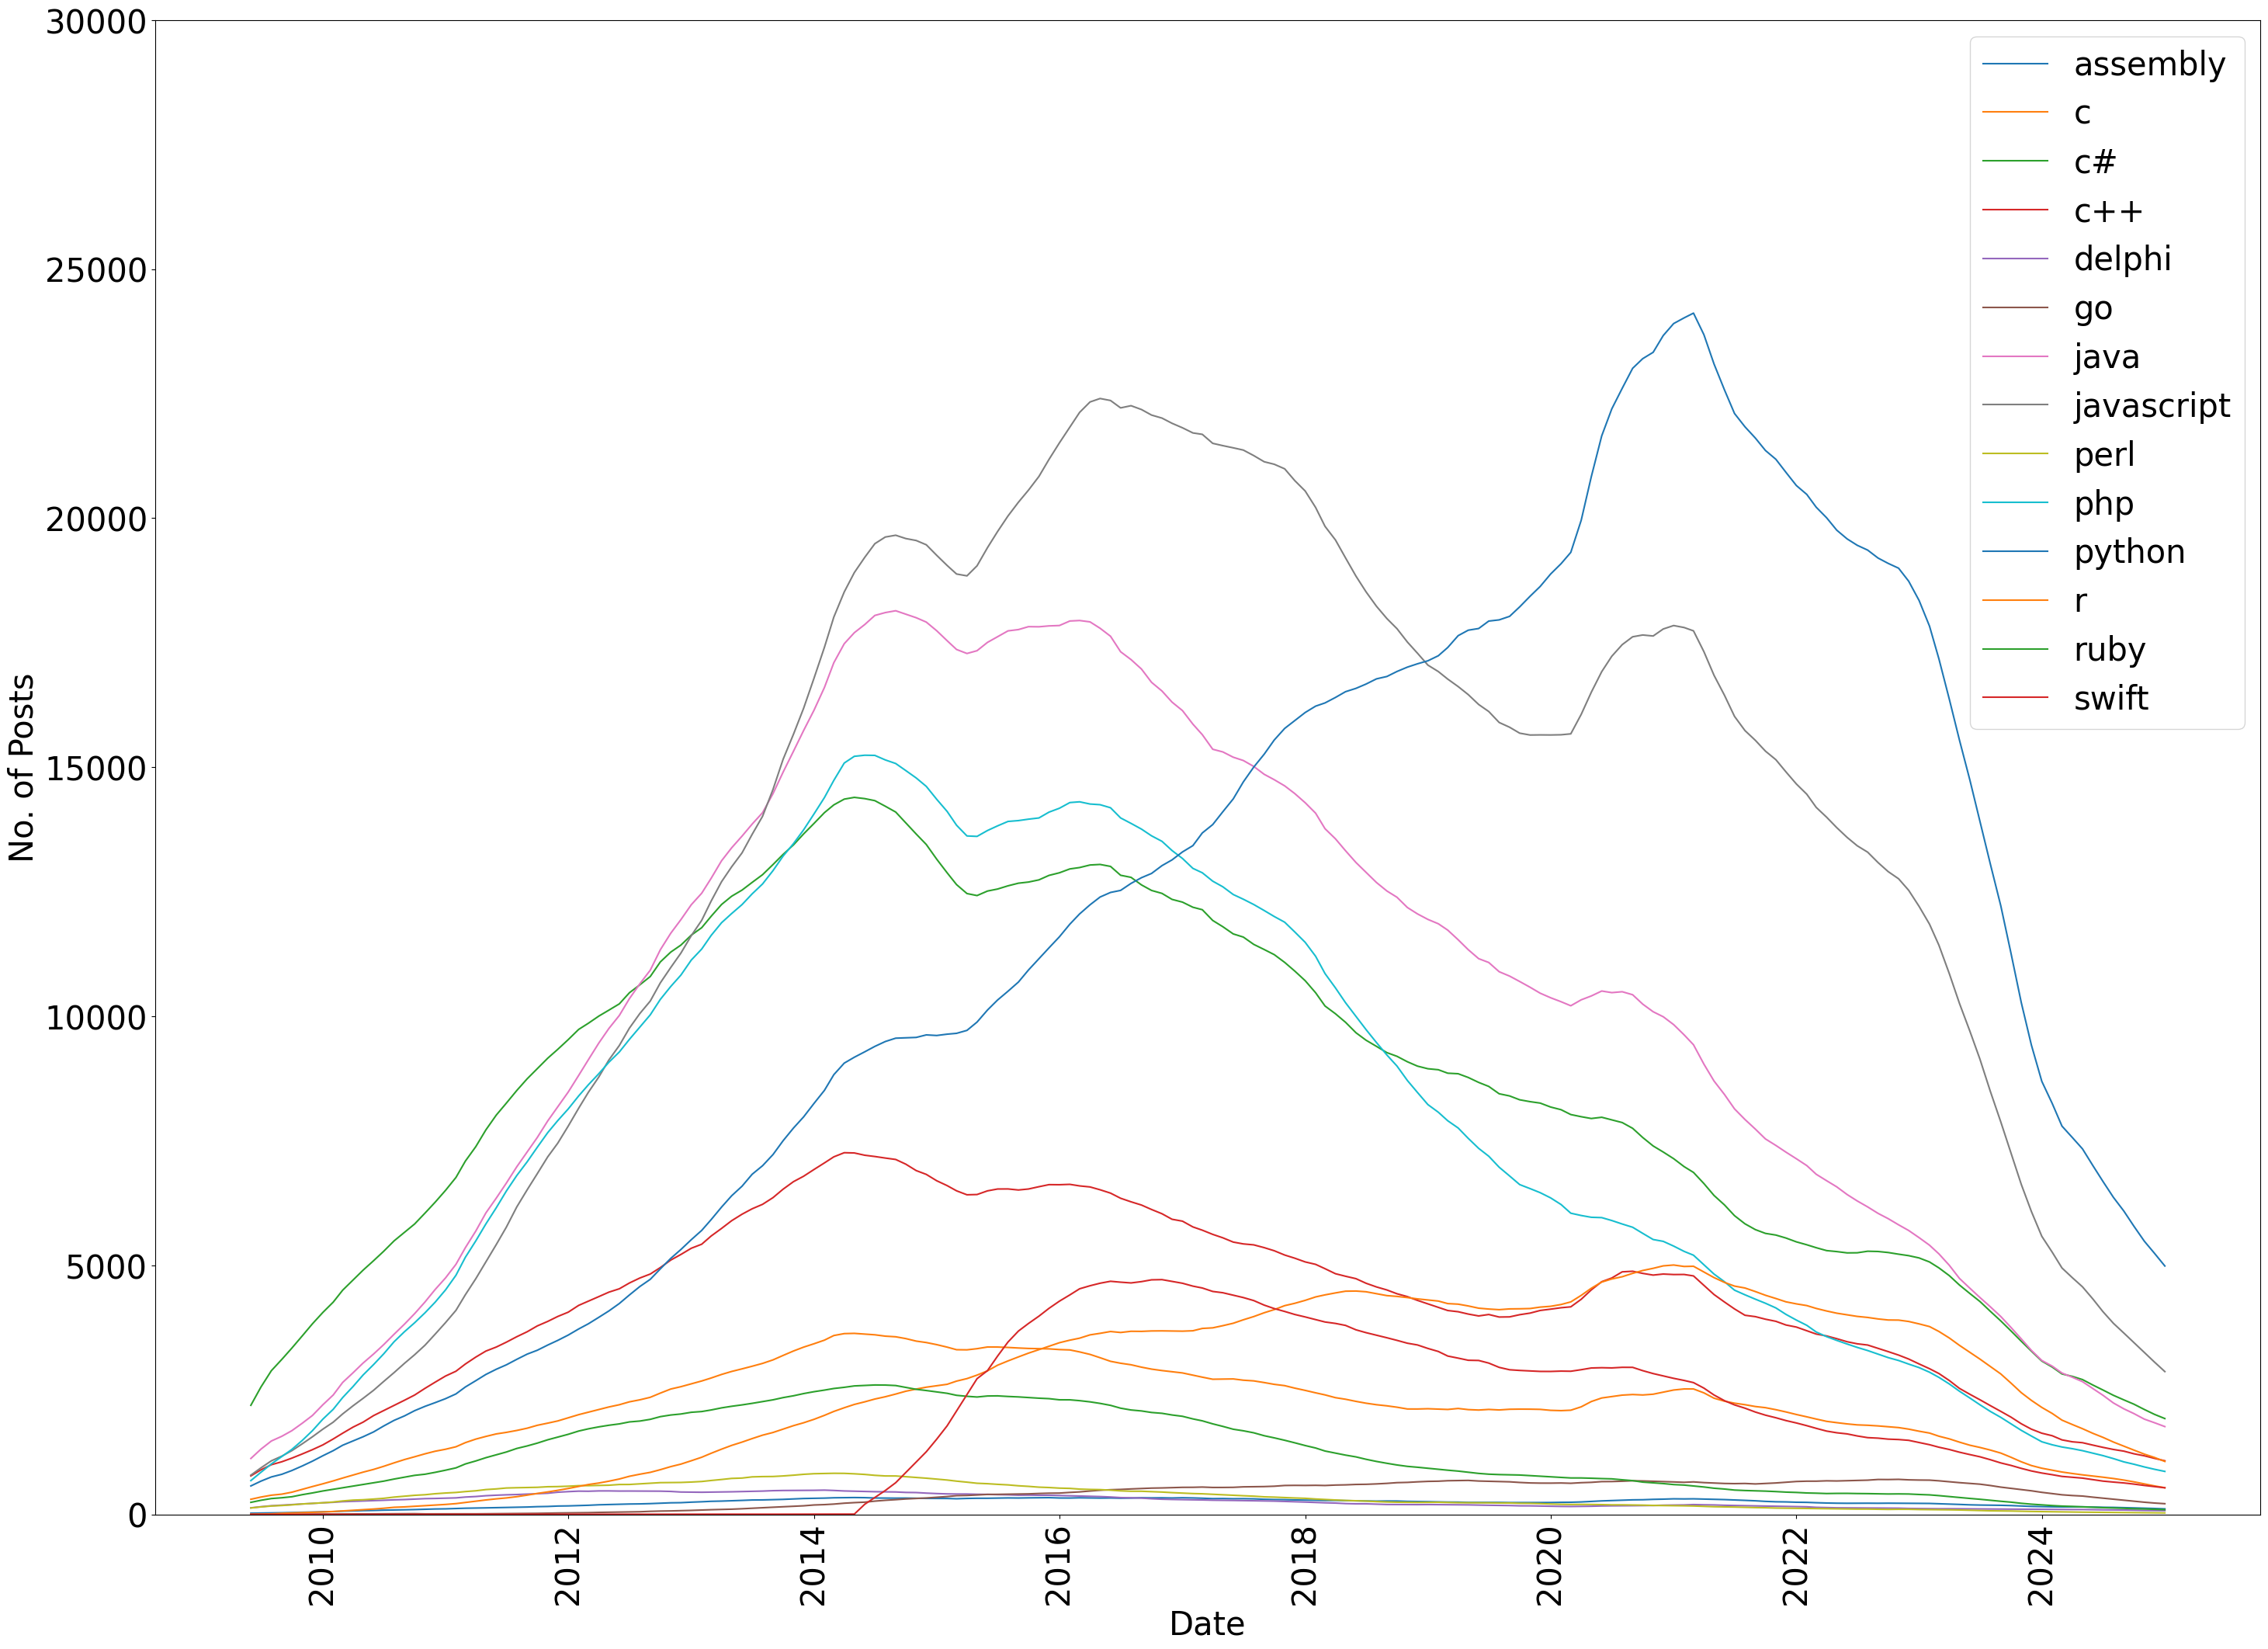

In [128]:
plt.figure(figsize=(35, 25))
plt.xticks(rotation=90, size=30)
plt.yticks(size=30)
plt.xlabel('Date', size=30)
plt.ylabel('No. of Posts', size=30)
plt.ylim((0, 30000))
for columns in roll_df.columns:
    plt.plot(roll_df.index, roll_df[columns], label=columns)
plt.legend(fontsize=30)